In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/processed/nacional.csv')

C:\Users\isaij\AppData\Local\Temp\ipykernel_25884\3513714135.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed/nacional.csv')


In [3]:
df = df.drop('ID', axis=1)
df = df.drop('CALLE2', axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180219 entries, 0 to 180218
Data columns (total 46 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   EDO         180219 non-null  int64  
 1   MES         180219 non-null  int64  
 2   ANIO        180219 non-null  int64  
 3   MPIO        180219 non-null  int64  
 4   HORA        180219 non-null  int64  
 5   MINUTOS     180219 non-null  int64  
 6   DIA         180219 non-null  int64  
 7   DIASEMANA   180219 non-null  int64  
 8   URBANA      180219 non-null  int64  
 9   SUBURBANA   180219 non-null  int64  
 10  TIPACCID    180219 non-null  int64  
 11  AUTOMOVIL   180219 non-null  int64  
 12  CAMPASAJ    180219 non-null  int64  
 13  MICROBUS    180219 non-null  int64  
 14  PASCAMION   180219 non-null  int64  
 15  OMNIBUS     180219 non-null  int64  
 16  TRANVIA     180219 non-null  int64  
 17  CAMIONETA   180219 non-null  int64  
 18  CAMION      180219 non-null  int64  
 19  TR

In [5]:
df.shape

(180219, 46)

**180,219 datos de 46 columnas**
Año 2019 únicamente

**Columnas destacables**:
- TIPACCID (Tipo de accidente):
     - 0: Certificado 0
     - 1: Colisión con vehículo automotor
     - 2: Colisión con peatón (atropellamiento)
     - 3: Colisión con animal
     - 4: Colisión con objeto fijo
     - 5: Volcadura
     - 6: Caída de pasajero
     - 7: Salida del camino
     - 8: Incendio
     - 9: Colisión con ferrocarril
     - 10: Colisión con motocicleta
     - 11: Colisión con ciclista
     - 12: Otro
- CLASE (Clase del accidente):
     - 1: Fatal
     - 2: No fatal
     - 3: Sólo daños
- CAUSAACCI (Causa probable o presunta del accidente)
    - 1: Conductor 
    - 2: Peatón o pasajero
    - 3: Falla de vehículo
    - 4: Mala condición del camino
    - 5: Otra
- CAPAROD (Capa de rodamiento)
    - 1: Pavimentada
    - 2: No pavimentada
- SEXO
    - 1: Se fugó
    - 2: Hombre
    - 3: Mujer
- ALIENTO
    - 4: Sí
    - 5: No
    - 6: Se ignora
- CINTURON
    - 7: Sí
    - 8: No
    - 9: Se ignora
- EDAD
    - 0: Se ignora porque se fugó
    - 99: No especificado

In [6]:
from IPython.display import display, HTML

def create_scrolleable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height: 220px; overflow: auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [7]:
numerical_features = df.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrolleable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
EDO,180219.0,16.373285,7.100668,1.00000,11.00000,19.00000,19.00000,32.00000
MES,180219.0,6.545558,3.477758,1.00000,3.00000,7.00000,10.00000,12.00000
ANIO,180219.0,2019.000000,0.000000,2019.00000,2019.00000,2019.00000,2019.00000,2019.00000
MPIO,180219.0,32.148148,30.395565,1.00000,14.00000,26.00000,39.00000,193.00000
HORA,180219.0,12.750037,5.932928,0.00000,8.00000,13.00000,18.00000,23.00000
MINUTOS,180219.0,25.999723,17.756017,0.00000,10.00000,27.00000,40.00000,59.00000
DIA,180219.0,15.630733,8.798444,1.00000,8.00000,15.00000,23.00000,31.00000
DIASEMANA,180219.0,3.972334,1.966724,1.00000,2.00000,4.00000,6.00000,7.00000
URBANA,180219.0,1.019510,0.206587,0.00000,1.00000,1.00000,1.00000,2.00000
SUBURBANA,180219.0,0.026157,0.248610,0.00000,0.00000,0.00000,0.00000,3.00000


In [8]:
df.describe(include=['O'])

,CALLE1
count,180219
unique,22981
top,AVENIDA EUGENIO GARZA SADA
freq,1907


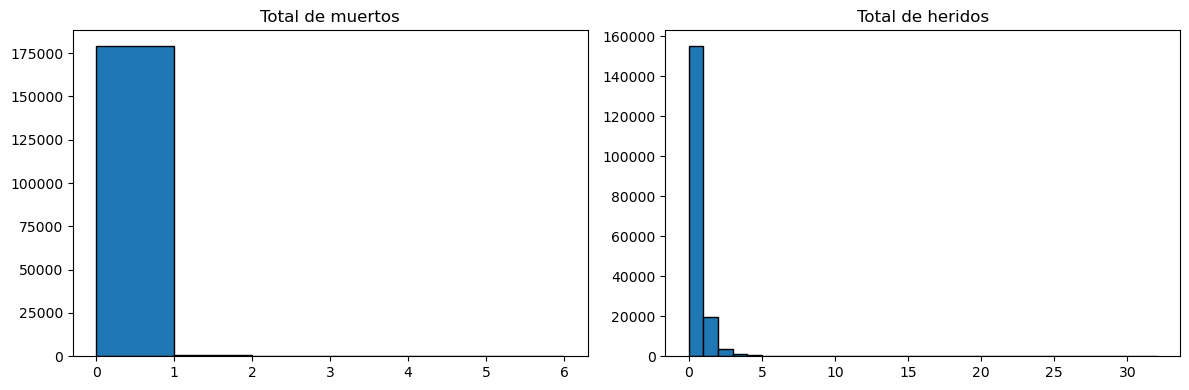

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(df['TOTMUERTOS'], bins=6, edgecolor='black')
axes[0].set_title("Total de muertos")

axes[1].hist(df['TOTHERIDOS'], bins=32, edgecolor='black')
axes[1].set_title("Total de heridos")

plt.tight_layout()
plt.show()

In [10]:
# Agrupación de muertos y heridos por mes, día de la semana y día del mes
death_month = df.groupby('MES')['TOTMUERTOS'].sum()
death_weekday = df.groupby('DIASEMANA')['TOTMUERTOS'].sum()
death_day = df.groupby('DIA')['TOTMUERTOS'].sum()

injured_month = df.groupby('MES')['TOTHERIDOS'].sum()
injured_weekday = df.groupby('DIASEMANA')['TOTHERIDOS'].sum()
injured_day = df.groupby('DIA')['TOTHERIDOS'].sum()

In [11]:
death_month_max = death_month.idxmax()
death_month_min = death_month.idxmin()

death_weekday_max = death_weekday.idxmax()
death_weekday_min = death_weekday.idxmin()

death_day_max = death_day.idxmax()
death_day_min = death_day.idxmin()
# ---
injured_month_max = injured_month.idxmax()
injured_month_min = injured_month.idxmin()

injured_weekday_max = injured_weekday.idxmax()
injured_weekday_min = injured_weekday.idxmin()

injured_day_max = injured_day.idxmax()
injured_day_min = injured_day.idxmin()

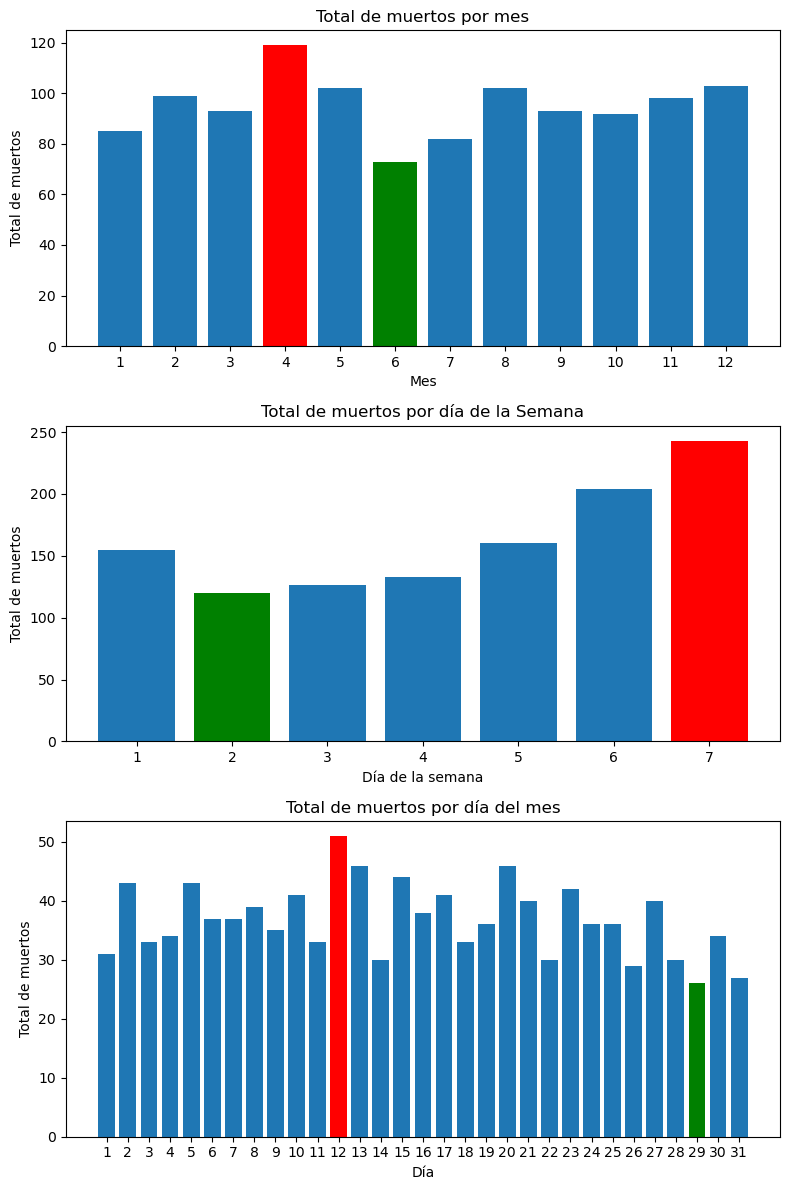

In [12]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

colors = ['red' if i == death_month_max else 'green' if i == death_month_min else 'C0' for i in death_month.index]
axes[0].bar(death_month.index, death_month.values, color=colors)
axes[0].set_title('Total de muertos por mes')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Total de muertos')
axes[0].set_xticks(range(1, 13))

colors = ['red' if i == death_weekday_max else 'green' if i == death_weekday_min else 'C0' for i in death_weekday.index]
axes[1].bar(death_weekday.index, death_weekday.values, color=colors)
axes[1].set_title('Total de muertos por día de la Semana')
axes[1].set_xlabel('Día de la semana')
axes[1].set_ylabel('Total de muertos')
axes[1].set_xticks(range(1, 8))

colors = ['red' if i == death_day_max else 'green' if i == death_day_min else 'C0' for i in death_day.index]
axes[2].bar(death_day.index, death_day.values, color=colors)
axes[2].set_title('Total de muertos por día del mes')
axes[2].set_xlabel('Día')
axes[2].set_ylabel('Total de muertos')
axes[2].set_xticks(range(1, 32))

plt.tight_layout()
plt.show()

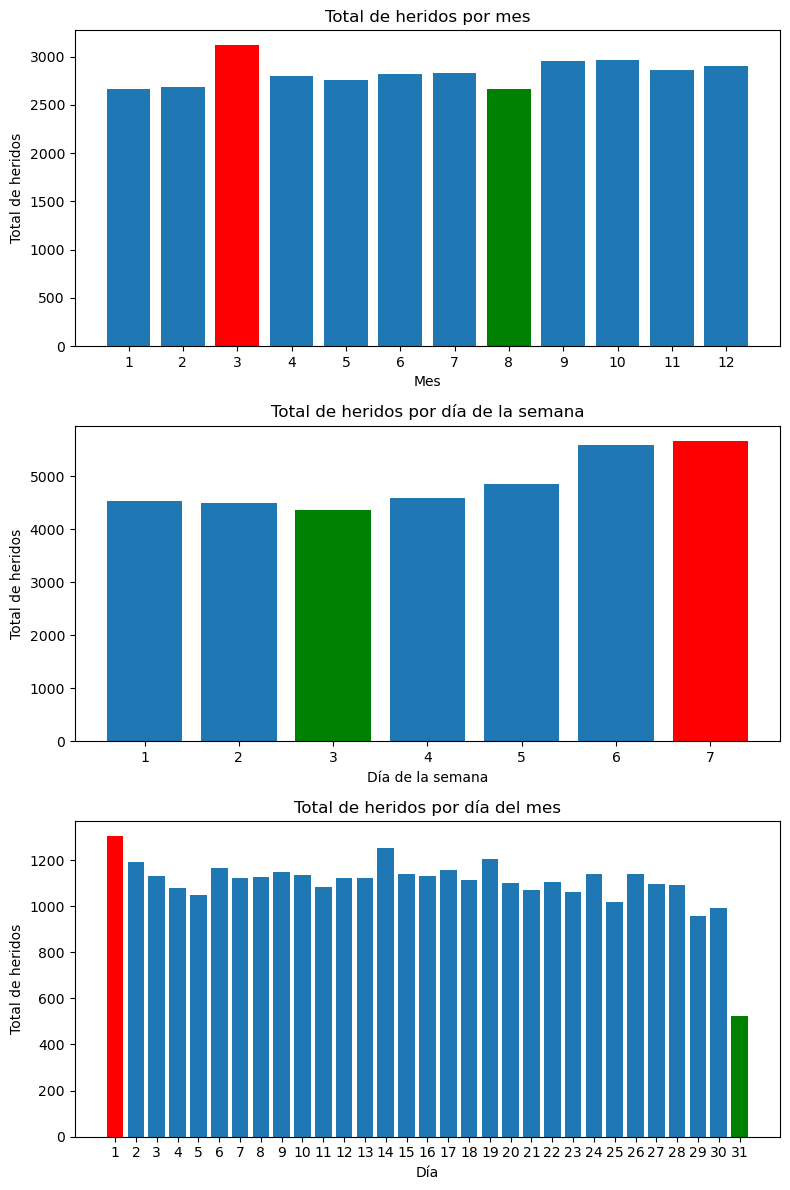

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

colors = ['red' if i == injured_month_max else 'green' if i == injured_month_min else 'C0' for i in injured_month.index]
axes[0].bar(injured_month.index, injured_month.values, color=colors)
axes[0].set_title('Total de heridos por mes')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Total de heridos')
axes[0].set_xticks(range(1, 13))

colors = ['red' if i == injured_weekday_max else 'green' if i == injured_weekday_min else 'C0' for i in injured_weekday.index]
axes[1].bar(injured_weekday.index, injured_weekday.values, color=colors)
axes[1].set_title('Total de heridos por día de la semana')
axes[1].set_xlabel('Día de la semana')
axes[1].set_ylabel('Total de heridos')
axes[1].set_xticks(range(1, 8))

colors = ['red' if i == injured_day_max else 'green' if i == injured_day_min else 'C0' for i in injured_day.index]
axes[2].bar(injured_day.index, injured_day.values, color=colors)
axes[2].set_title('Total de heridos por día del mes')
axes[2].set_xlabel('Día')
axes[2].set_ylabel('Total de heridos')
axes[2].set_xticks(range(1, 32))

plt.tight_layout()
plt.show()

In [14]:
print(f"Promedio de muertos por mes: {death_month.mean()}")
print(f"Promedio de heridos por mes: {injured_month.mean()}\n")

print(f"Promedio de muertos por día de la semana: {death_weekday.mean()}")
print(f"Promedio de heridos por día de la semana: {injured_weekday.mean()}\n")

print(f"Promedio de muertos por día del mes: {death_day.mean()}")
print(f"Promedio de heridos por día del mes: {injured_day.mean()}")

Promedio de muertos por mes: 95.08333333333333
Promedio de heridos por mes: 2838.0

Promedio de muertos por día de la semana: 163.0
Promedio de heridos por día de la semana: 4865.142857142857

Promedio de muertos por día del mes: 36.806451612903224
Promedio de heridos por día del mes: 1098.5806451612902


In [15]:
deaths_count = df[(df['CLASE'] == 1) & (df['TOTMUERTOS'] > 0)]
deaths_count = deaths_count.shape[0]
deaths_percentage = (deaths_count / df.shape[0]) * 100

print(f"Cantidad de accidentes fatales: {deaths_count}")
print(f"Accidentes fatales frente al total de accidentes: {deaths_percentage:.4f}%")

Cantidad de accidentes fatales: 1058
Accidentes fatales frente al total de accidentes: 0.5871%


In [16]:
injured_count = df[df['TOTHERIDOS'] > 0]
injured_count = injured_count.shape[0]
injured_percentage = (injured_count / df.shape[0]) * 100

print(f"Cantidad de accidentes con heridos: {injured_count}")
print(f"Accidentes con heridos frente al total de accidentes: {injured_percentage:.4f}%")

Cantidad de accidentes con heridos: 24942
Accidentes con heridos frente al total de accidentes: 13.8398%


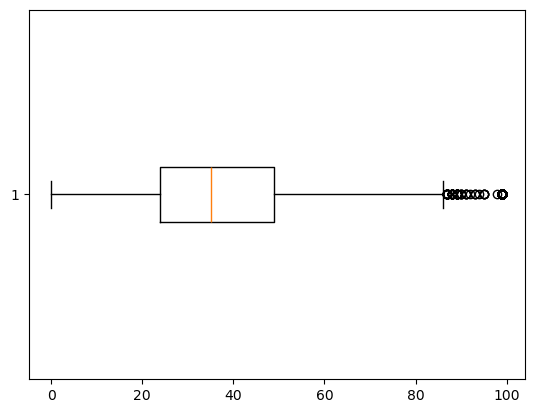

In [17]:
plt.boxplot(df['EDAD'], vert=False)
plt.show()

In [ ]:
import seaborn as sns

In [59]:
df_corr = df.drop('CALLE1', axis=1)

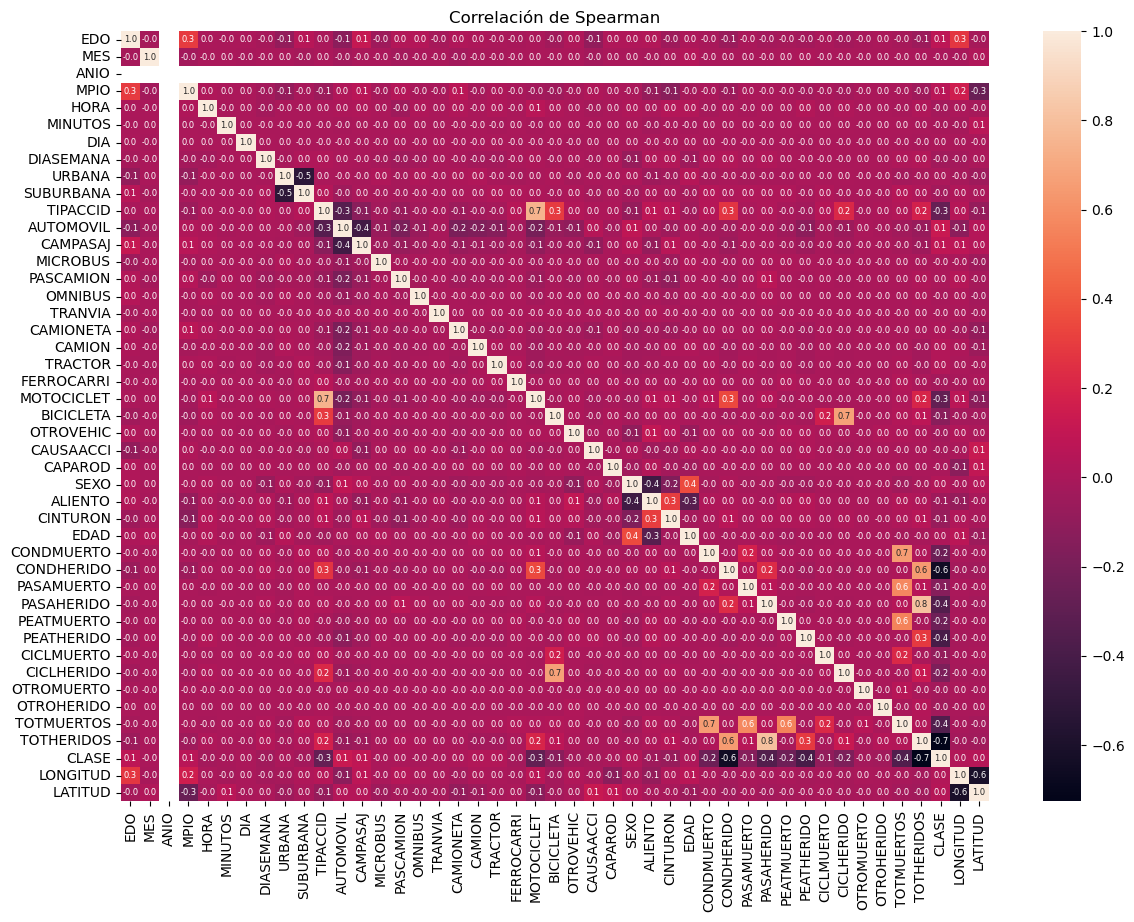

In [72]:
corr = df_corr.corr(method='pearson')

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".1f", annot_kws={"size": 6})
plt.title("Correlación de Spearman")

plt.show()

In [73]:
corr_filtered = corr[(corr > 0.6) | (corr < -0.6)]

corr_filtered = corr_filtered.where(~np.eye(corr.shape[0], dtype=bool))

corr_filtered = corr_filtered.dropna(how='all').dropna(how='all', axis=1)

html_corr = create_scrolleable_table(corr_filtered, 'correlaciones', 'Correlaciones')

display(HTML(html_corr))

,TIPACCID,MOTOCICLET,BICICLETA,CONDMUERTO,CONDHERIDO,PASAHERIDO,CICLHERIDO,TOTMUERTOS,TOTHERIDOS,CLASE,LONGITUD,LATITUD
TIPACCID,NaN,0.745232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MOTOCICLET,0.745232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BICICLETA,NaN,NaN,NaN,NaN,NaN,NaN,0.674303,NaN,NaN,NaN,NaN,NaN
CONDMUERTO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.652556,NaN,NaN,NaN,NaN
CONDHERIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.645830,-0.649067,NaN,NaN
PASAHERIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.808474,NaN,NaN,NaN
CICLHERIDO,NaN,NaN,0.674303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TOTMUERTOS,NaN,NaN,NaN,0.652556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TOTHERIDOS,NaN,NaN,NaN,NaN,0.645830,0.808474,NaN,NaN,NaN,-0.726159,NaN,NaN
CLASE,NaN,NaN,NaN,NaN,-0.649067,NaN,NaN,NaN,-0.726159,NaN,NaN,NaN


In [74]:
corr_filtered.columns

Index(['TIPACCID', 'MOTOCICLET', 'BICICLETA', 'CONDMUERTO', 'CONDHERIDO',
       'PASAHERIDO', 'CICLHERIDO', 'TOTMUERTOS', 'TOTHERIDOS', 'CLASE',
       'LONGITUD', 'LATITUD'],
      dtype='object')

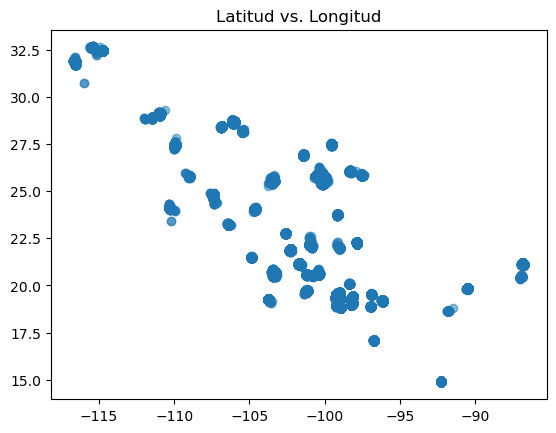

In [55]:
plt.scatter(df['LONGITUD'], df['LATITUD'], alpha=0.5)
plt.title("Latitud vs. Longitud")

plt.show()